In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

In [2]:
dftrain = pd.read_csv('train.csv')
dftrain

,Unnamed: 0,Negara/Tahun,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,...,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C
0,0,Afghanistan/1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,1,Afghanistan/1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,2,Afghanistan/1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,3,Afghanistan/1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,4,Afghanistan/1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,5598,Zimbabwe/2010,2795.6192,283.6316,109.3055,3.0243,0.0,87.000000,157.6366,262.6108,...,302.3508,0.0,0.0,2074.1869,9410211.0,4676106.0,6034165.0,6805605.0,23601.395453,0.911917
5599,5599,Zimbabwe/2011,2918.2098,168.1659,100.7798,3.7456,0.0,94.000000,268.6740,648.0808,...,312.2478,0.0,0.0,966.3719,9636932.0,4749717.0,6114111.0,6911674.0,23470.631605,0.191167
5600,5600,Zimbabwe/2012,2164.8953,259.4249,103.8422,5.5527,0.0,91.000000,304.6578,648.0808,...,314.3433,0.0,0.0,908.2629,9880721.0,4830105.0,6223803.0,7041528.0,22903.232305,0.337000
5601,5601,Zimbabwe/2013,1544.9329,238.1898,96.8978,5.8016,0.0,73.000000,338.5506,648.0808,...,317.9359,0.0,0.0,546.0138,10138667.0,4915839.0,6363142.0,7192279.0,22245.497305,0.089667


In [4]:
dftrain.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

In [8]:
dftrain[["Negara", "Tahun"]] = dftrain["Negara/Tahun"].str.split("/", expand=True)
dftrain["Tahun"] = dftrain["Tahun"].astype(int)

In [10]:
dftrain.drop(columns=["Negara/Tahun"], inplace=True)

In [11]:
dftrain.head()

,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,...,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C,Negara,Tahun
0,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,...,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,Afghanistan,1990
1,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,...,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,Afghanistan,1991
2,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,...,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,Afghanistan,1992
3,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,...,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,Afghanistan,1993
4,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,...,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,Afghanistan,1994


# Data Cleaning

In [12]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Emisi Savanna Api                            5578 non-null   float64
 1   Emisi Kebakaran Hutan                        5528 non-null   float64
 2   Emisi Residu Tanaman                         4485 non-null   float64
 3   Emisi Budidaya Padi                          5603 non-null   float64
 4   Emisi Tanah Organik Yang Dikeringkan (Co2)   5603 non-null   float64
 5   Emisi Pembuatan Pestisida                    5603 non-null   float64
 6   Emisi Transportasi Makanan                   5603 non-null   float64
 7   Lahan Hutan                                  5206 non-null   float64
 8   Konversi Hutan Bersih                        5206 non-null   float64
 9   Emisi Konsumsi Rumah Tangga Makanan          5214 non-null   float64
 10  

In [13]:
dftrain.describe(include="all")

,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,...,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C,Negara,Tahun
count,5578.000000,5528.000000,4485.000000,5603.000000,5603.000000,5603.000000,5603.000000,5206.000000,5.206000e+03,5214.000000,...,5478.000000,4821.000000,5.603000e+03,5.603000e+03,5.603000e+03,5.603000e+03,5.603000e+03,5603.000000,5603,5603.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN
mean,1229.654445,924.275199,949.205076,4241.101704,3471.791570,327.522289,1823.138303,-18145.654062,1.845452e+04,4290.229336,...,668.283943,3015.805047,1.794903e+07,1.573881e+07,1.703881e+07,1.675670e+07,6.057137e+04,0.750170,NaN,2002.116723
std,5472.353828,3692.584881,3498.477164,17599.627763,15488.661938,1445.484865,5306.417931,81045.735821,1.080050e+05,20691.807663,...,3243.015188,12391.323706,9.073657e+07,5.920313e+07,7.398219e+07,7.056196e+07,2.084904e+05,0.498943,NaN,7.166377
min,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,...,0.000000,0.031900,0.000000e+00,0.000000e+00,2.700000e+02,3.000000e+02,-3.918841e+05,-1.415833,NaN,1990.000000
25%,0.000000,0.000000,10.921100,172.219300,0.000000,5.000000,26.262663,-3224.371500,0.000000e+00,10.011225,...,0.000000,12.181500,9.431400e+04,2.045720e+05,1.948370e+05,2.003545e+05,5.135030e+03,0.440333,NaN,1996.000000
50%,1.657900,0.661850,98.037400,515.517200,0.000000,12.328281,176.065300,-69.534600,4.461600e+01,136.267400,...,0.000000,134.477500,1.572038e+06,2.201558e+06,2.336340e+06,2.338950e+06,1.174802e+04,0.729750,NaN,2002.000000
75%,114.309200,71.094900,356.216100,1551.410550,694.164500,106.981731,1135.649750,0.000000,4.734968e+03,1357.825900,...,10.189775,1151.396200,7.836860e+06,7.690343e+06,8.586906e+06,8.617358e+06,3.292111e+04,1.030167,NaN,2008.000000


In [15]:
missing_values = dftrain.isnull().sum()
missing_values[missing_values > 0]

Emisi Savanna Api                                25
Emisi Kebakaran Hutan                            75
Emisi Residu Tanaman                           1118
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi IPPU                                      599
Emisi Kotoran Diterapkan Pada Tanah             752
Emisi Manajemen Pupuk                           752
Emisi Kebakaran Di Hutan Tropis Yang Lembab     125
Penggunaan Energi Di Pertanian                  782
dtype: int64

In [16]:
# ini pake median biar outlier nya ke tengah

numeric_features = dftrain.select_dtypes(include=['number']).columns
dftrain[numeric_features] = dftrain[numeric_features].fillna(dftrain[numeric_features].median())

In [17]:
missing_values = dftrain.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [19]:
fitur_numerik = dftrain.select_dtypes(include=[np.number]).columns.tolist()
if "Tahun" in fitur_numerik:
    fitur_numerik.remove("Tahun")

In [21]:
dftrain_winsorized = dftrain.copy()
for col in fitur_numerik:
    dftrain_winsorized[col] = winsorize(dftrain[col], limits=[0.05, 0.05])

In [28]:
for col in fitur_numerik:
    min_value = dftrain_winsorized[col].min()
    if min_value <= 0:
        dftrain_winsorized[col] += abs(min_value) + 1  # Geser ke positif
    dftrain_winsorized[col] = np.log1p(dftrain_winsorized[col])


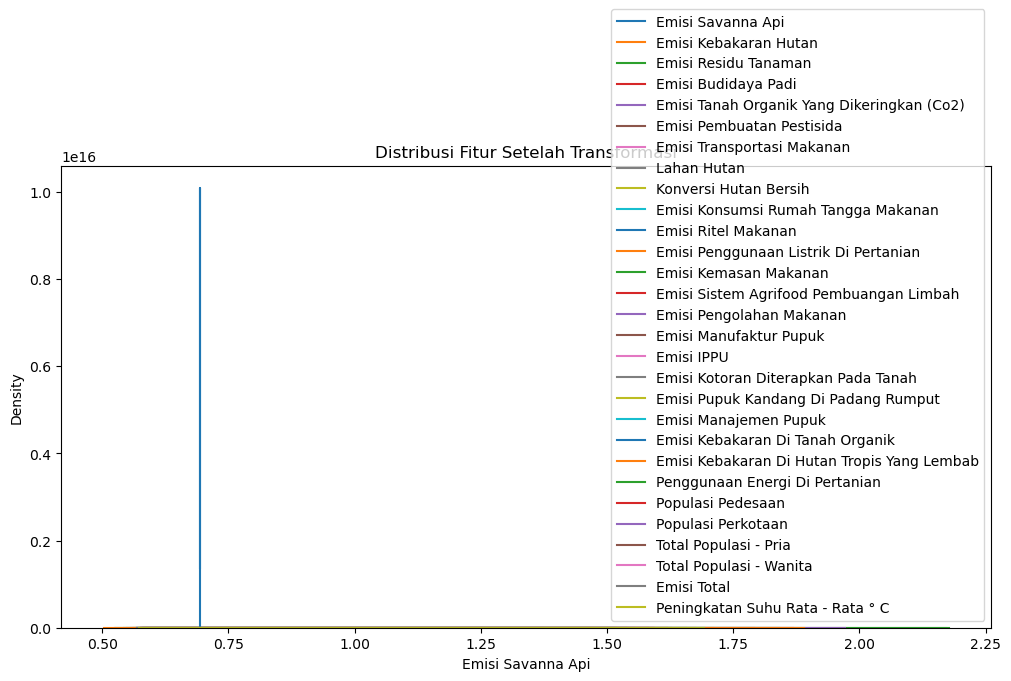

In [29]:
plt.figure(figsize=(12, 6))
for col in fitur_numerik:
    sns.kdeplot(dftrain_winsorized[col], label=col)
plt.legend()
plt.title("Distribusi Fitur Setelah Transformasi")
plt.show()

In [30]:
for col in fitur_numerik:
    dftrain_winsorized[col] = np.log1p(dftrain_winsorized[col])

In [32]:
scaler = RobustScaler()
dftrain_winsorized[fitur_numerik] = scaler.fit_transform(dftrain_winsorized[fitur_numerik])

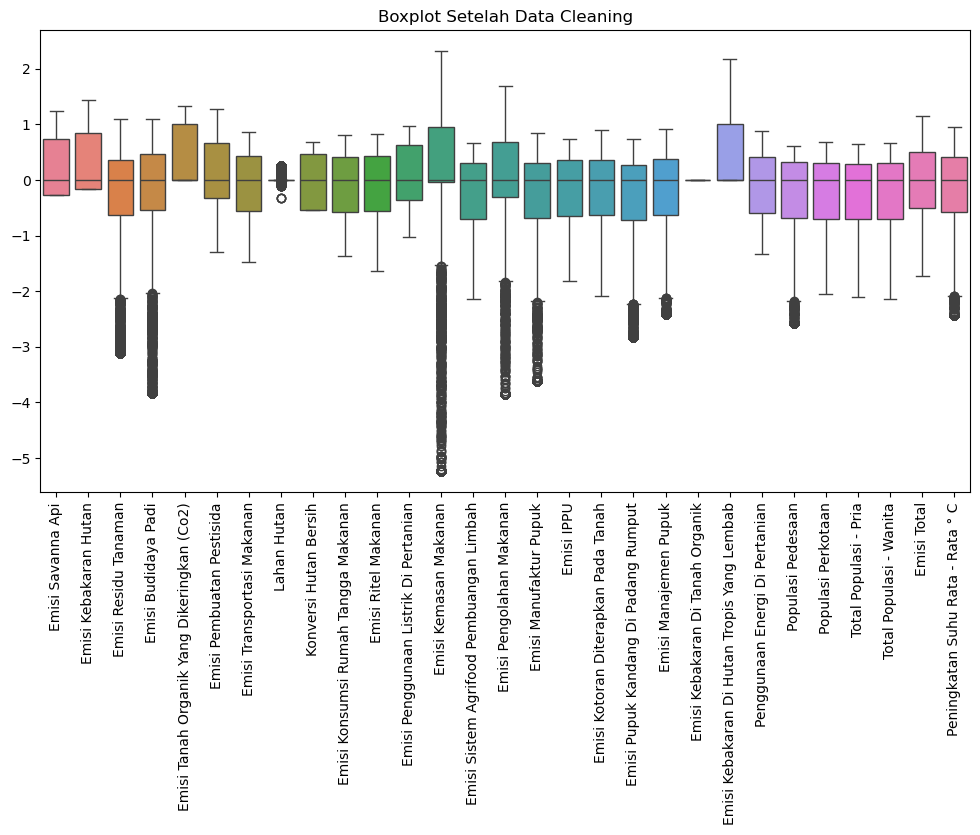

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dftrain_winsorized[fitur_numerik])
plt.xticks(rotation=90)
plt.title("Boxplot Setelah Data Cleaning")
plt.show()

In [35]:
dftrain_winsorized.to_csv('dftrain_cleaned.csv', index=False)
